# Telco Customer Churn

Telco Customer Churn data set has information about a fictional Telco company in California in third quarter of a year. This company provides homephone and Internet services and data has 7043 records with 21 features. 

Features are,
1. Customer ID
2. Gender
3. SeniorCitizon 
4. Partner : indicates whether the customer has a partner or not
5. Dependents: indicates whether the customer has dependents or not
6. Tenure: Number of months the customer has stayed with the company
7. Phone Service: indicates whether the customer has a phone service or not.
8. Multiple Lines
9. Internet Service: Customer's internet service provider
10. Online Security: indicates whether the customer has online security or not)
etc....

In [146]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv("C:/Users/waruni/OneDrive - Iowa State University/Documents/Customer Churn Project/Telco_Customer_Churn.csv")

In [47]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [48]:
df.shape

(7043, 21)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


"Total Charges" field is object, but it should be numerical. 

In [50]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
#check for missing values
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


'TotalCharges' field seem to have 11 missing values. Few options are,
1. Delete the entire column: will lose important information to study
2. Delete rows containing missing data: 11/7043 rows will have to be deleted. 
3. Imputation: fill the values with a certain number: mean\median if the field is numerical, most occured entry if the field is categorical.

In [52]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [53]:
df[df['tenure']==0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

It looks like all rows with missing total charges are associated with customers who have requested for services very recently because their tenure is equal to zero. 

In [54]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
#check for duplicates: None
df.duplicated().sum()

0

In [31]:
#Only work for numerical variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


We do not need "cutomerID" and "gender" fields as they will not be using for further analysis.

In [32]:
df.drop('customerID', inplace=True, axis=1)
df.drop('gender', inplace = True, axis=1)

In [33]:
df.head().T

,0,1,2,3,4
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No
DeviceProtection,No,Yes,No,Yes,No


In [41]:
#unique values of some of the categorical variables
print("Multiple Lines:")
print(*list(df.MultipleLines.unique()))
print("Internet Service:")
print(*list(df.InternetService.unique()))
print("Contract:")
print(*list(df.Contract.unique()))
print("Payment Method:")
print(*list(df.PaymentMethod.unique()))

Multiple Lines:
No phone service No Yes
Internet Service:
DSL Fiber optic No
Contract:
Month-to-month One year Two year
Payment Method:
Electronic check Mailed check Bank transfer (automatic) Credit card (automatic)


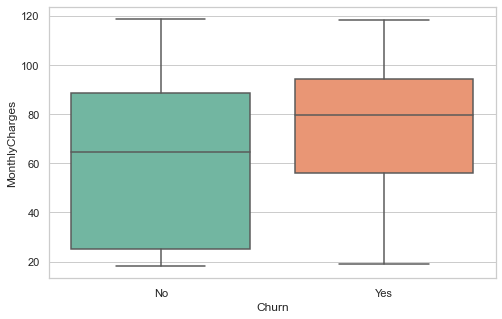

In [128]:
plt.figure(figsize=(8, 5))
sns.set(style='whitegrid')
sns.boxplot(x="Churn", y= "MonthlyCharges", data = df, palette="Set2")
plt.show()

Customers who churned has a high median of monthly charges than that of customers who did not churn.

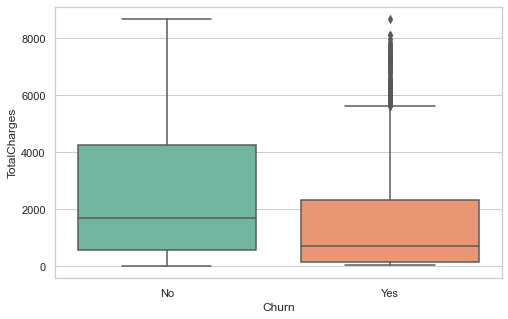

In [129]:
plt.figure(figsize=(8, 5))
sns.set(style='whitegrid')
sns.boxplot(x="Churn", y= "TotalCharges", data = df, palette="Set2")
plt.show()

Both distributions are right-skewed. Customers who did not churn has a higher median of total charges. Customers who did churn have some high amount of total charges which can be identified as outliers. It might be interesting to look at those outliers.

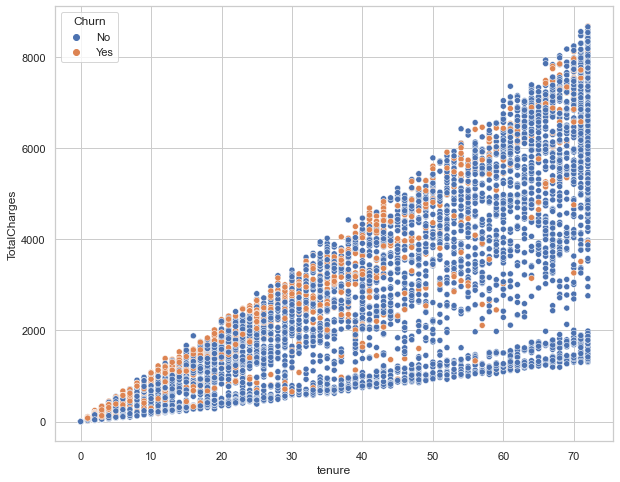

In [133]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="tenure", y="TotalCharges", hue= "Churn", data = df)
plt.show()

Higher the months of services the customers have taken, higher the range of total charges. It looks like customers who churned has had the their total charges in the close to the upper limit mostly.  

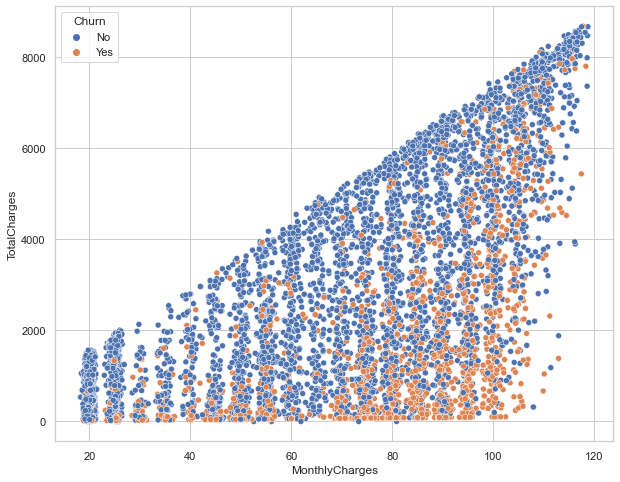

In [131]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", hue= "Churn", data = df)
plt.show()

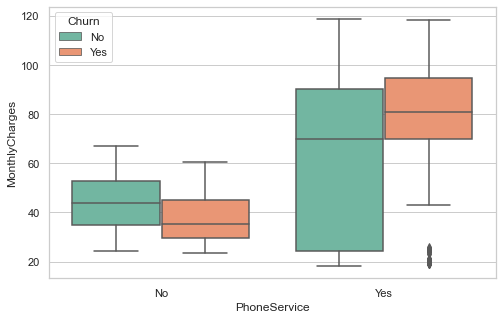

In [130]:
plt.figure(figsize=(8, 5))
sns.set(style='whitegrid')
sns.boxplot(x="PhoneService", y= "MonthlyCharges", hue= "Churn", data = df, palette="Set2")
plt.show()

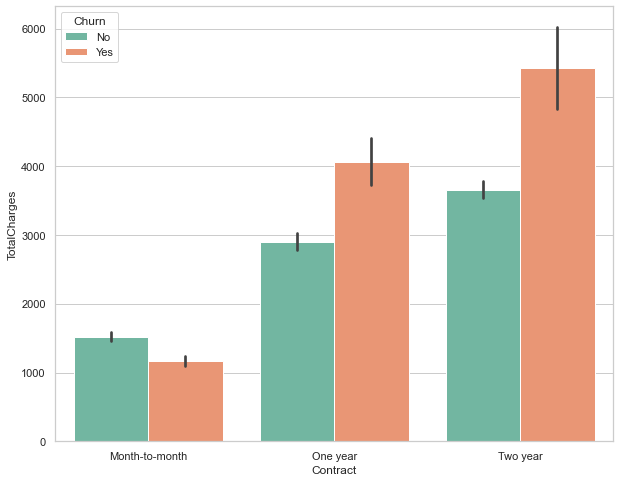

In [73]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Contract", y="TotalCharges", hue="Churn", data = df, palette="Set2")
plt.show()

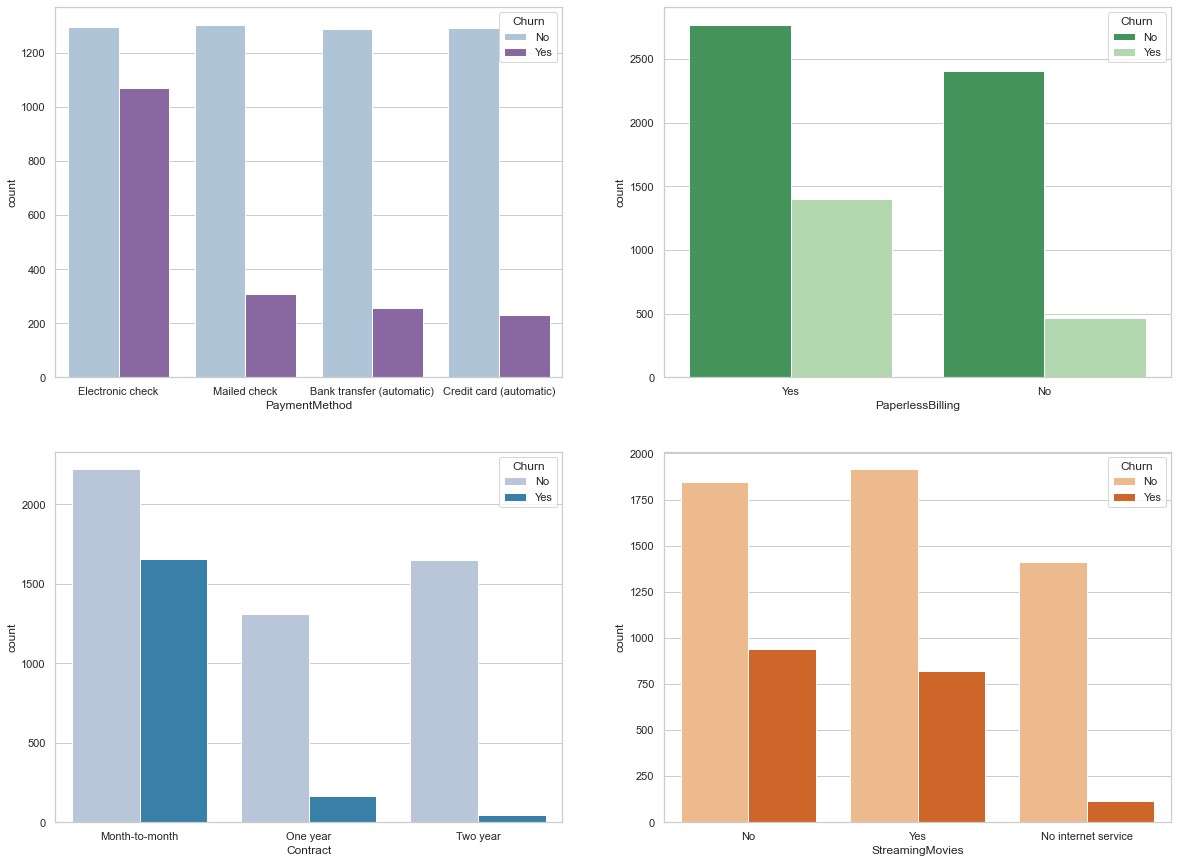

In [90]:
fig, ax = plt.subplots(2,2, figsize=(20, 15))
sns.countplot(x="PaymentMethod",hue="Churn", data = df, palette="BuPu", ax=ax[0,0])
sns.countplot(x="PaperlessBilling",hue="Churn", data = df, palette="Greens_r", ax=ax[0,1])
sns.countplot(x="Contract",hue="Churn", data = df, palette="PuBu", ax=ax[1,0])
sns.countplot(x="StreamingMovies",hue="Churn", data = df, palette="Oranges", ax=ax[1,1])
plt.show()

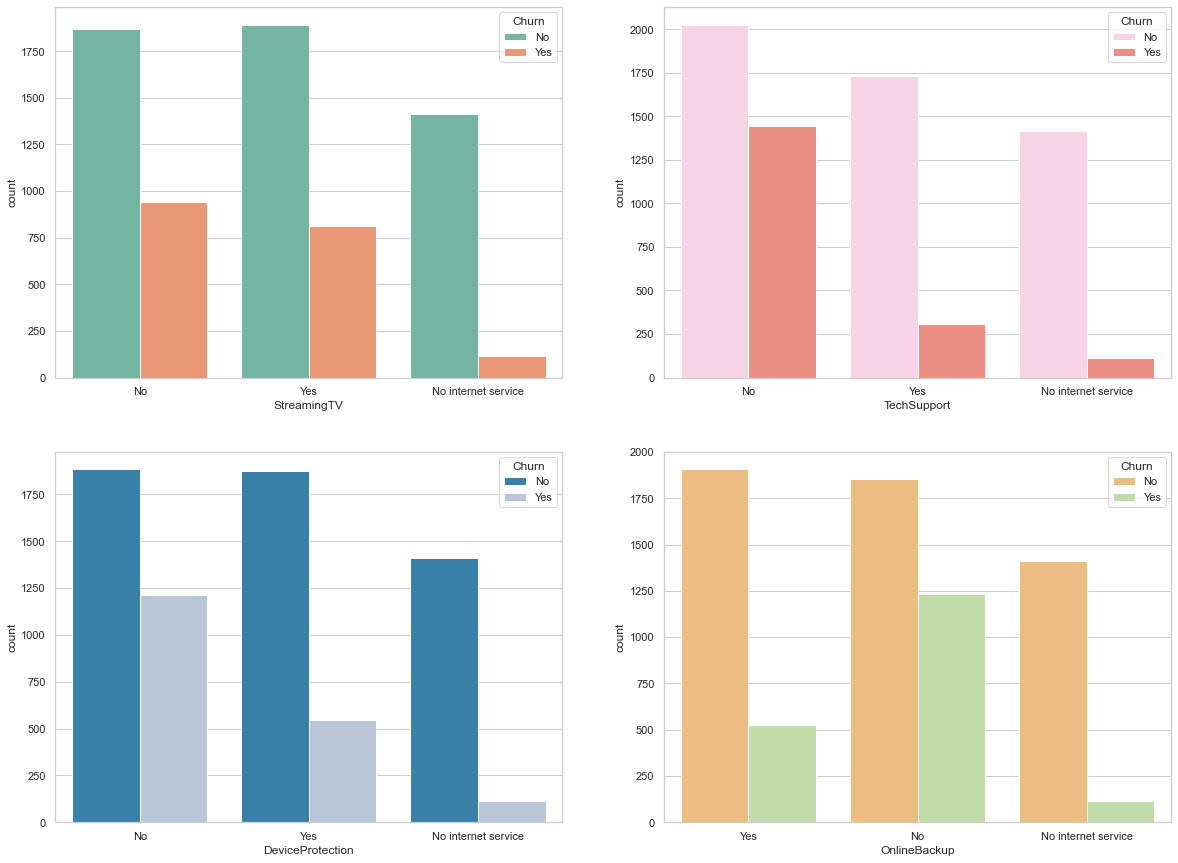

In [134]:
fig, ax = plt.subplots(2,2, figsize=(20, 15))
sns.countplot(x="StreamingTV",hue="Churn", data = df, palette="Set2", ax=ax[0,0])
sns.countplot(x="TechSupport",hue="Churn", data = df, palette="Set3_r", ax=ax[0,1])
sns.countplot(x="DeviceProtection",hue="Churn", data = df, palette="PuBu_r", ax=ax[1,0])
sns.countplot(x="OnlineBackup",hue="Churn", data = df, palette="Spectral", ax=ax[1,1])
plt.show()

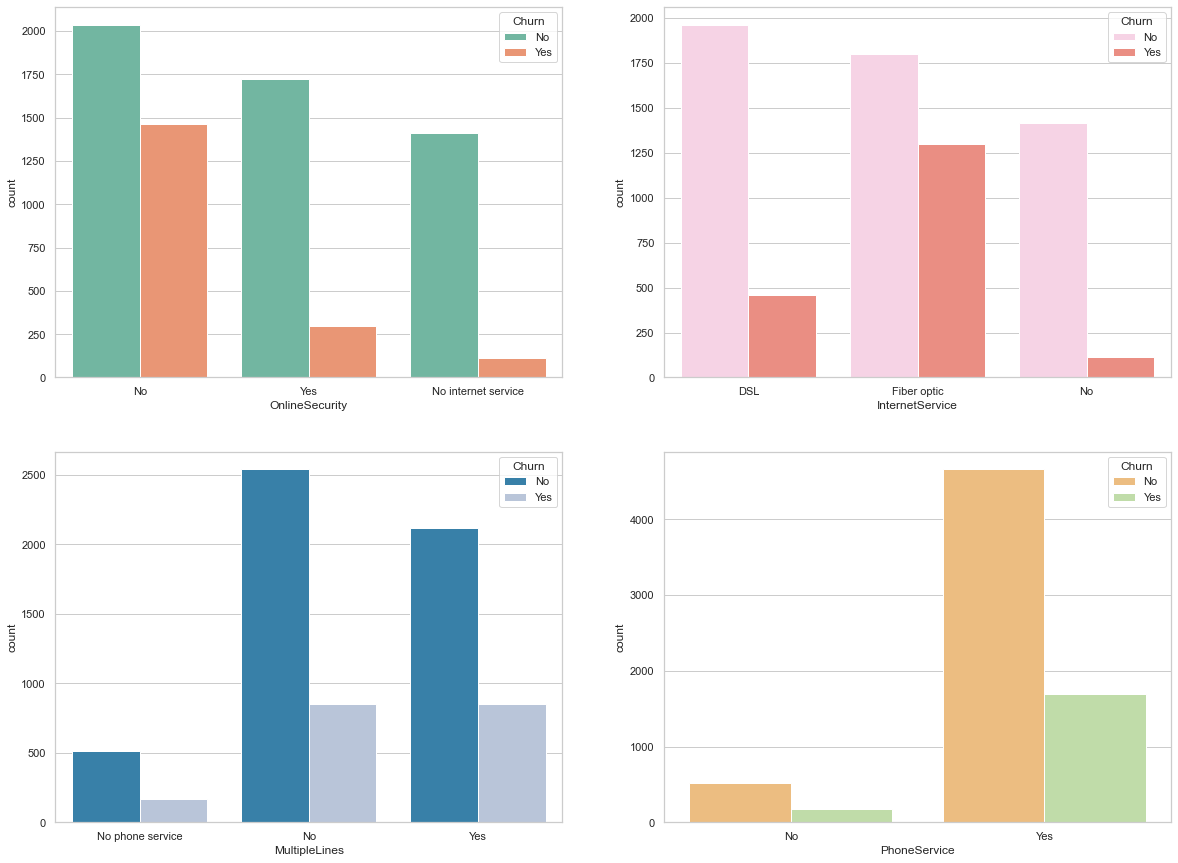

In [97]:
fig, ax = plt.subplots(2,2, figsize=(20, 15))
sns.countplot(x="OnlineSecurity",hue="Churn", data = df, palette="Set2", ax=ax[0,0])
sns.countplot(x="InternetService",hue="Churn", data = df, palette="Set3_r", ax=ax[0,1])
sns.countplot(x="MultipleLines",hue="Churn", data = df, palette="PuBu_r", ax=ax[1,0])
sns.countplot(x="PhoneService",hue="Churn", data = df, palette="Spectral", ax=ax[1,1])
plt.show()

In [99]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [121]:
#Row wise proportion
ct = pd.crosstab(df.Dependents, df.Churn, margins = True) 
ct.columns=["No Churn", "Churn", "Row Total"]
ct.index=["No Dependent", "Dependent", "Col Total"]
ct.div(ct['Row Total'], axis = 0)

,No Churn,Churn,Row Total
No Dependent,0.687209,0.312791,1.0
Dependent,0.845498,0.154502,1.0
Col Total,0.734630,0.265370,1.0


In [123]:
ct = pd.crosstab(df.Partner, df.Churn, margins = True) 
ct.columns=["No Churn", "Churn", "Row Total"]
ct.index=["No Partner", "Partner", "Col Total"]
ct

,No Churn,Churn,Row Total
No Partner,2441,1200,3641
Partner,2733,669,3402
Col Total,5174,1869,7043


In [118]:
ct = pd.crosstab(df.SeniorCitizen, df.Churn, margins = True) 
ct.columns=["No Churn", "Churn", "Row Total"]
ct.index=["No Senior Citizen", "Senior Citizen", "Col Total"]
print(ct)

                   No Churn  Churn  Row Total
No Senior Citizen      4508   1393       5901
Senior Citizen          666    476       1142
Col Total              5174   1869       7043


In [116]:
pd.crosstab(df.Dependents, df.Churn, margins = True) 

Churn,No,Yes,All
Dependents,,,
No,3390,1543,4933
Yes,1784,326,2110
All,5174,1869,7043


In [125]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Chi Square Test

In [136]:
#churn percentage by Internet Service. To get percentage by column, do normalize ='column'. For total percentage, do normalize = 'all'
contingency = pd.crosstab(df['InternetService'], df['Churn'], normalize = 'index')
contingency

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


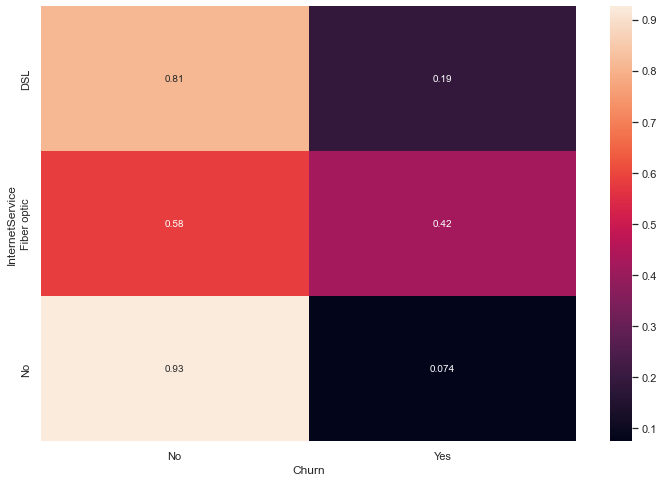

In [138]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True)
plt.show()

In [141]:
#chi-square test for independence: Internet Service & Churn
c,p, dof, expected =chi2_contingency(contingency)
significance_level = 0.05
print('p value:' +str(p))
if p<=significance_level:
    print('Reject NULL, implying that two variables are not independent')
else:
    print('Accept NULL. Conclusion is two variables are independent ')

p value:0.8391850030004063
Accept NULL. Conclusion is two variables are independent 


In [142]:
#chi-square test for independence: Online Backup & Churn
contingency = pd.crosstab(df['OnlineBackup'], df['Churn'], normalize = 'index')
c,p, dof, expected =chi2_contingency(contingency)
significance_level = 0.05
print('p value:' +str(p))
if p<=significance_level:
    print('Reject NULL, implying that two variables are not independent')
else:
    print('Accept NULL. Conclusion is two variables are independent ')

p value:0.8603755865644523
Accept NULL. Conclusion is two variables are independent 


In [143]:
#chi-square test for independence: Payment Method & Churn
contingency = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize = 'index')
c,p, dof, expected =chi2_contingency(contingency)
significance_level = 0.05
print('p value:' +str(p))
if p<=significance_level:
    print('Reject NULL, implying that two variables are not independent')
else:
    print('Accept NULL. Conclusion is two variables are independent ')

p value:0.9539277015457
Accept NULL. Conclusion is two variables are independent 


In [144]:
#chi-square test for independence: Contract & Churn
contingency = pd.crosstab(df['Contract'], df['Churn'], normalize = 'index')
c,p, dof, expected =chi2_contingency(contingency)
significance_level = 0.05
print('p value:' +str(p))
if p<=significance_level:
    print('Reject NULL, implying that two variables are not independent')
else:
    print('Accept NULL. Conclusion is two variables are independent ')

p value:0.749982984873135
Accept NULL. Conclusion is two variables are independent 


In [145]:
#chi-square test for independence: Payment Method & Churn
contingency = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize = 'index')
c,p, dof, expected =chi2_contingency(contingency)
significance_level = 0.05
print('p value:' +str(p))
if p<=significance_level:
    print('Reject NULL, implying that two variables are not independent')
else:
    print('Accept NULL. Conclusion is two variables are independent ')

p value:0.9539277015457
Accept NULL. Conclusion is two variables are independent 


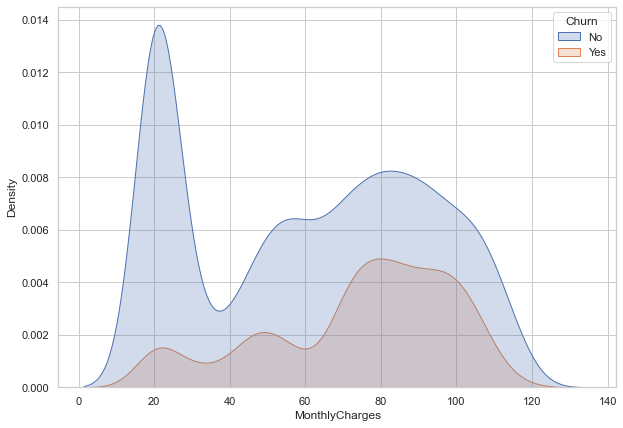

In [151]:
plt.figure(figsize=(10,7))
sns.kdeplot(x='MonthlyCharges', hue='Churn',data = df, shade= True)
plt.show()

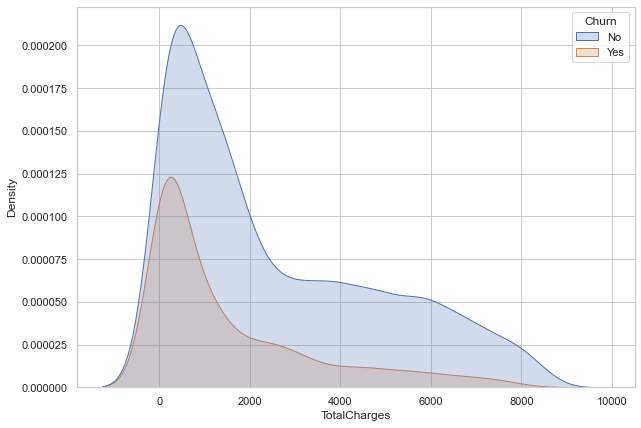

In [152]:
plt.figure(figsize=(10,7))
sns.kdeplot(x='TotalCharges', hue='Churn',data = df, shade= True)
plt.show()